## Breast Cancer Data

### 30개의 속성, 2개의 타겟 (mallgnant, benign)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=42)
print(dir(cancer))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
(426, 30)
(426,)
(143, 30)
(143,)


In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [6]:
np.bincount(cancer.target)

array([212, 357], dtype=int64)

In [7]:
malignant = cancer.data[cancer.target ==0]
benign = cancer.data[cancer.target==1]
_, bins = np.histogram(cancer.data[:,0], bins=20)
print(bins)
print(x_train.shape)
print(y_train.shape)

[ 6.981    8.03745  9.0939  10.15035 11.2068  12.26325 13.3197  14.37615
 15.4326  16.48905 17.5455  18.60195 19.6584  20.71485 21.7713  22.82775
 23.8842  24.94065 25.9971  27.05355 28.11   ]
(426, 30)
(426,)


(426, 30)
(426,)


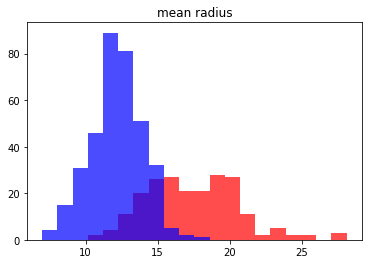

In [7]:
plt.hist(malignant[:,0], bins=bins, color='red', alpha=0.7)
plt.hist(benign[:,0], bins=bins, color='blue', alpha=0.7)
plt.title(cancer.feature_names[0])
print(x_train.shape)
print(y_train.shape)

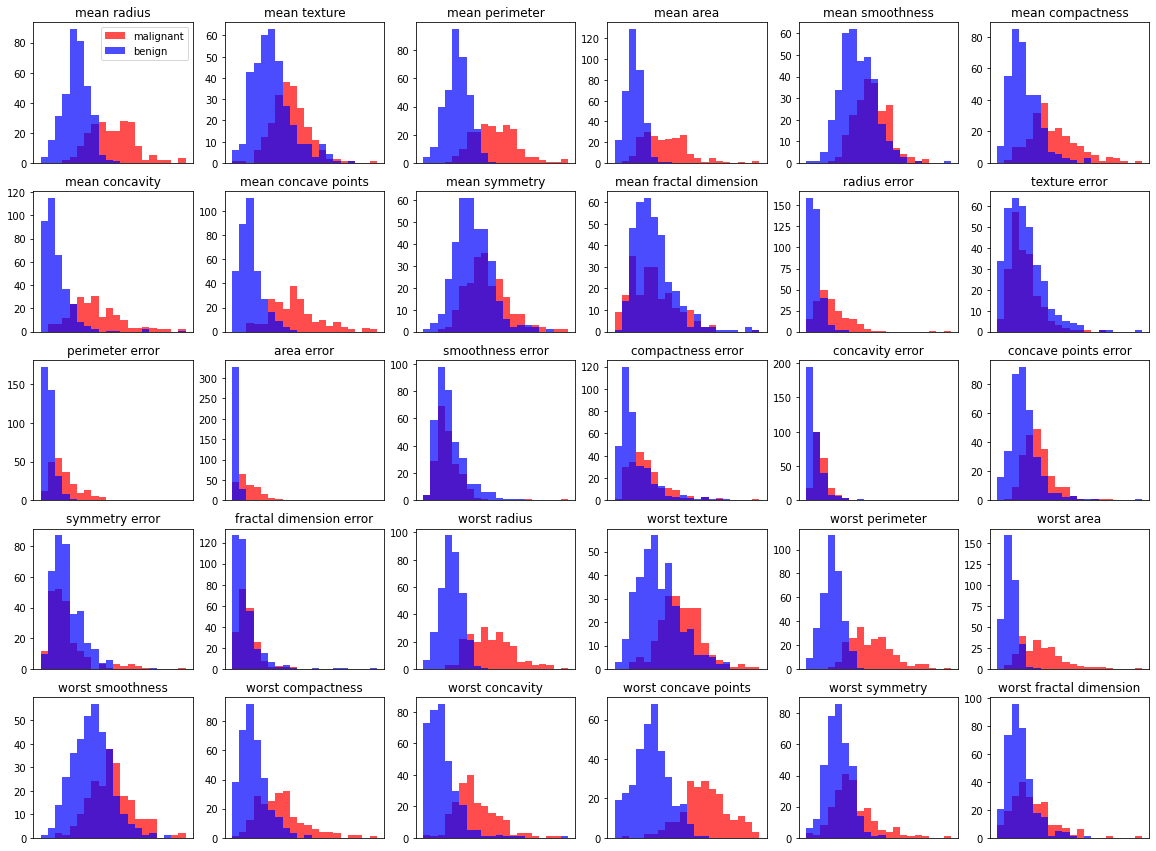

In [8]:
plt.figure(figsize=[20,15])

for col in range(30):
    plt.subplot(5, 6, col+1)
    _, bins=np.histogram(cancer.data[:,col], bins=20)
    
    plt.hist(malignant[:,col], bins=bins, color='red', alpha=0.7)
    plt.hist(benign[:,col], bins=bins, color='blue', alpha=0.7)
    plt.title(cancer.feature_names[col])
    if col==0:
        plt.legend(cancer.target_names)
    plt.xticks([])

In [9]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train = x_train_scaled
x_test = x_test_scaled

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(30,)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 4,130
Trainable params: 4,130
Non-trainable params: 0
_________________________________________________________________


In [10]:
print(x_train.shape)
print(y_train.shape)

(426, 30)
(426, 2)


In [11]:
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 2s 139ms/step - loss: 0.4259 - accuracy: 0.8803 - val_loss: 0.1727 - val_accuracy: 0.9626
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1862 - accuracy: 0.9779 - val_loss: 0.0492 - val_accuracy: 0.9720
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0313 - accuracy: 0.9861 - val_loss: 0.0750 - val_accuracy: 0.9813
Epoch 4/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0203 - accuracy: 0.9880 - val_loss: 0.0405 - val_accuracy: 0.9907
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0146 - accuracy: 0.9970 - val_loss: 0.0762 - val_accuracy: 0.9626
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0338 - accuracy: 0.9921 - val_loss: 0.0412 - val_accuracy: 0.9813
Epoch 7/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0789 - accuracy: 0.9832 - val_loss: 0.1356 - val_accuracy: 0.9907
Epoch 8/25
10/10 [

In [12]:
print("훈련 세트 정확도")
print(model.evaluate(x_train, y_train, verbose=0))
print("테스트 세트 정확도")
print(model.evaluate(x_test, y_test, verbose=0))

훈련 세트 정확도
[0.02133222296833992, 0.9906103014945984]
테스트 세트 정확도
[0.2954188585281372, 0.9510489702224731]


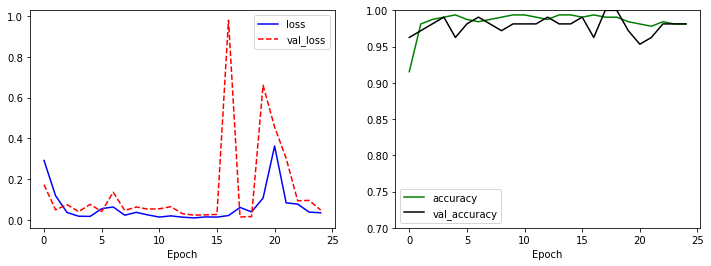

In [13]:
#분류 모델 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k-', label='val_accuracy')
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()

plt.show()